<a href="https://colab.research.google.com/github/kaushaln1/ML_DM_labs/blob/main/MachineLearning_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Imports
"""
import numpy as np
rng = np.random.default_rng()

from matplotlib import pyplot as plt


In [ ]:
'''
Helper function to plot a linear separator
'''


def plotLinearSeparator(w, X, y, title='', Xs=None, Xlabels=None, markers=None):
    '''
    Plot data points a linear separator
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
        title: a string
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    '''
    Plot data points in X, y
    '''

    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',color='blue', facecolors='none', label='+1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],marker='x', color='red', label='-1')
    axs.set_xlabel('X1')
    axs.set_ylabel('X2')
    axs.set_xlim(ranges[0, 0], ranges[0, 1])
    axs.set_ylim(ranges[1, 0], ranges[1, 1])

    '''
    Plot separator
    '''

    pltxs = np.linspace(ranges[0, 0], ranges[0, 1])
    pltys =  -(w[0] + w[1] * pltxs) / w[2]
    axs.plot(pltxs, pltys, color='green', label='separator')

    axs.set_title(title)
    pltxs = np.linspace(ranges[0, 0], ranges[0, 1])
    pltys = - (w0[0] + w0[1] * pltxs) / w0[2]
    plt.plot(pltxs, pltys, color='purple', label='target')
    axs.legend()
    plt.show()

In [ ]:
def E(w, X, y, R=None):
    '''
    point-wise error measure for classification
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    N = X.shape[0]
    '''
    TODO: Compute the (average) misclassification error of the linear model with weights w
    on the data points in the data set X whose labels are in y
    yhat = ?
    error = ?
    '''
    total_error = 0.0

    for i in range(N):
      x= X[i,:]
      yValue= y[i]           ##expected value
      wT=np.transpose(w)
      yhat = np.sign(np.dot(wT,x))   ## actual value
      if yhat != yValue:
        total_error += 1.0

    average_error = total_error / N    #Error total misclassfied points / total points

    return average_error


In [ ]:
d = 2 # number of dimensions for each input
N = 20 # number of data points in sample (training set)
# ranges: a d x 2 2D array, for each dimension j, ranges[j, 0] is the lower limit and ranges[j, 1] is the upper limit of values to be generated
ranges = [[-10, 10],
          [-10, 10]
         ]
ranges = np.array(ranges) # stay in numpy land

In [ ]:
"""
Fix a linear target function
"""

w= np.transpose(np.array([[1, 1, -1]])) # d+1 x 1 array, a column vector, my choice of target function, which I will soon forget and only recall much later

w0= np.transpose(np.array([[1, 1, -1]])) # d+1 x 1 array, a column vector, my choice of target function, which I will soon forget and only recall much later

In [ ]:
"""
Plot the target function
"""

def plotLine(w, ranges):
    pltxs = np.linspace(ranges[0, 0], ranges[0, 1])
    pltys = - (w[0] + w[1] * pltxs) / w[2]
    plt.plot(pltxs, pltys, color='purple', label='separator')
    plt.title(f'The target function {w[:, 0]}')
    plt.legend()
    plt.show()

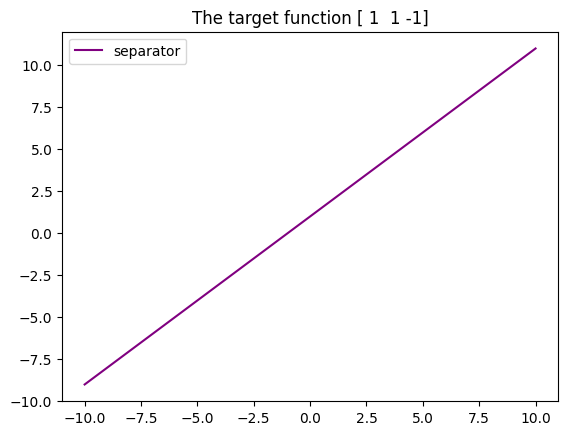

In [ ]:
plotLine(w, ranges)

In [ ]:
def generateSeparatedData(N, d, ranges, w):
    """
    Randomly generate a dataset with N data points in d-dimensions
    Input:
        N: an integer, number of data points
        d: an integer, number of dimensions / features for each data point
        ranges: a d x 2 2D array,
                    for each dimension j,
                        ranges[j, 0] is the lower limit and
                        ranges[j, 1] is the upper limit
                    of values to be generated
        w: a d+1 x 1 2D array of weights that define the linear target function
    Output:
        X: an N x d+1 2D array of data points,
            for each data point i,
                X[i, 0] = 1 and
                for each j in {1, 2, ..., d} X[i, j] is the value of the j-th feature
        y: an N x 1 2D array of labels,
            for each data point i,
                y[i] is either +1 or -1 indicating how the target function classifies data point i
    """
    print(f'Generating data with {N} data points, each with {d} dimensions')
    assert(w.shape == (d+1, 1)) # sanity check that the target function is well defined
    # initialize
    X = np.zeros((N, d+1))
    y = np.zeros((N, 1))
    # generate data points
    X[:, 0] = np.ones(N) # the "bias" feature, the 0-th column, all ones. Note the numpy weirdness here, it will not work with np.ones((N, 1))
    for j in range(1, d+1):
        X[:, j] = rng.uniform(low=ranges[j-1, 0], high=ranges[j-1, 1], size=N) # ugh, python has 0-indexing + more numpy weirdness
    # generate labels using the target function
    # apply the sign function to the linear signal computed at each data point
    y = np.sign(np.matmul(X, w))
    assert(X.shape == (N, d+1)) # check that the data points have the right dimesionality
    assert(y.shape == (N, 1)) # check that the labels have the right dimenstionality
    return X, y

In [ ]:
X, y = generateSeparatedData(N, d, ranges, w)

Generating data with 20 data points, each with 2 dimensions


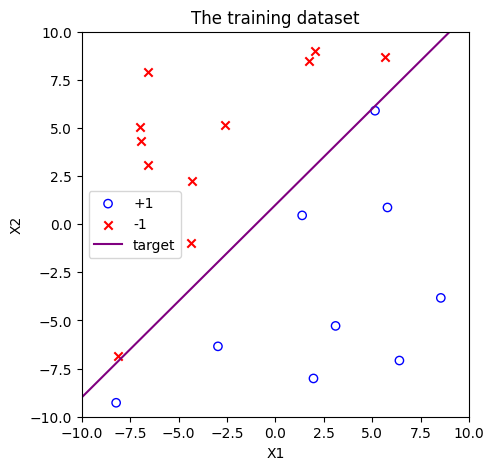

In [ ]:
plus1s = np.where(y == 1)[0]
minus1s = np.where(y == -1)[0]

Xplus1s = X[plus1s, :]
Xminus1s = X[minus1s, :]

fig, axs = plt.subplots(figsize=(5, 5))
axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
            color='blue', facecolors='none', label='+1')
axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
            marker='x', color='red', label='-1')
axs.set_xlabel('X1')
axs.set_ylabel('X2')
axs.set_xlim(ranges[0, 0], ranges[0, 1])
axs.set_ylim(ranges[1, 0], ranges[1, 1])
'''
Plot separator
'''
pltxs = np.linspace(ranges[0, 0], ranges[0, 1])
pltys = - (w[0] + w[1] * pltxs) / w[2]
axs.plot(pltxs, pltys, color='purple', label='target')
axs.set_title('The training dataset')
axs.legend()
plt.show()

In [ ]:
'''
The Pocket algorithm (variant of the Perceptron Learning Algorithm)
'''


def pocket(X, y, max_iters=1000, w_init=None):
    '''
    Implements the Pocket algorithm
    Input:
        X: a 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: a 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        max_iters: an integer; maximum number of iterations of PLA
        w_init: a 2D (d+1) x 1 numpy array
                intended to set initial weights for PLA
    Output:
        w_best: a 2D (d+1) x 1 numpy array, weights with lowest error on the input training set X, y
    '''
    Eins = []
    ws = []

    Ein_best = np.infty
    w_best = 0

    w = np.zeros((d+1, 1))
    w = w + 0.0000001
    if not isinstance(w_init, type(None)):
        w = w_init
    counter = 0
    for i in range(max_iters):
        Ein = E(w, X, y)
        Eins.append(Ein)
        ws.append(w)
        if Ein> 0.01 :       # converses after this many interations  with 0.01 as threshold
          counter+=1
        if Ein < Ein_best:
            Ein_best = Ein
            w_best = w
        yhat = np.sign(np.matmul(X, w))
        #TODO identify the misclassified samples and update weights
        ## Selecting 0 th index for misclassifications
        mis = (np.where (y != yhat)[0])
        misIndex = np.random.choice(mis)
        w = w +  (X[misIndex] * y[misIndex]).reshape(-1,1)


    plt.scatter(range(max_iters), Eins)
    plt.xlabel('iteration')
    plt.ylabel('in sample error')
    plt.title('PLA')
    plt.tight_layout()
    plt.show()

    print(f'Ein_best {Ein_best}, \nw_best \n{w_best}')
    print("Converging after ", counter, "iterations")
    return w_best

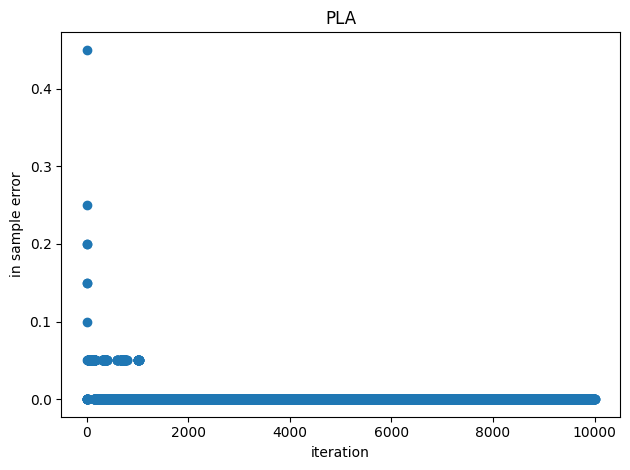

Ein_best 0.0, 
w_best 
[[  1.0000001 ]
 [ 26.47378598]
 [-26.73238471]]
Converging after  281 iterations


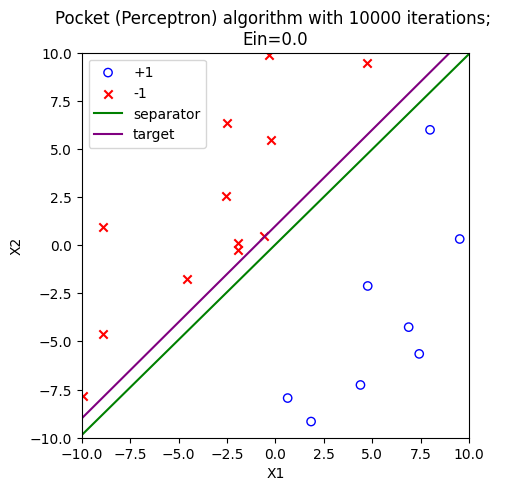

In [ ]:
'''
Run the Pocket algorithm
'''
execute = True
if execute:
    max_iters = 10000
    X = np.squeeze(np.asarray(X))
    y = np.squeeze(np.asarray(y))
    w = pocket(X,y, max_iters=max_iters)
    Ein = np.round(E(w, X, y), 5)
    plotLinearSeparator(
        w, X, y, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')

In [ ]:
X, y = generateSeparatedData(1000, 2, ranges, w0)

Generating data with 1000 data points, each with 2 dimensions


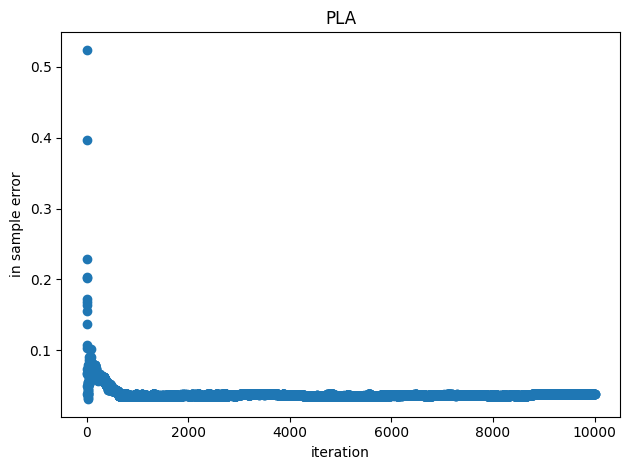

Ein_best 0.031, 
w_best 
[[   7.0000001 ]
 [  91.69577434]
 [-103.47372671]]
Converging after  10000 iterations


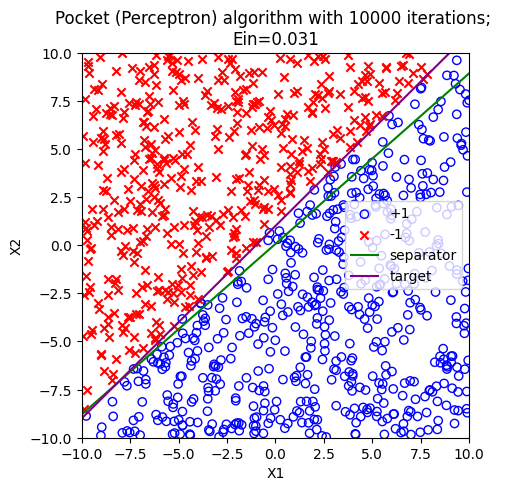

In [ ]:
execute = True
if execute:
    max_iters = 10000
    X = np.squeeze(np.asarray(X))
    y = np.squeeze(np.asarray(y))
    w = pocket(X,y, max_iters=max_iters)
    Ein = np.round(E(w, X, y), 5)
    plotLinearSeparator(
        w, X, y, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')


In [ ]:
X, y = generateSeparatedData(100, 2, ranges, w0)

Generating data with 100 data points, each with 2 dimensions


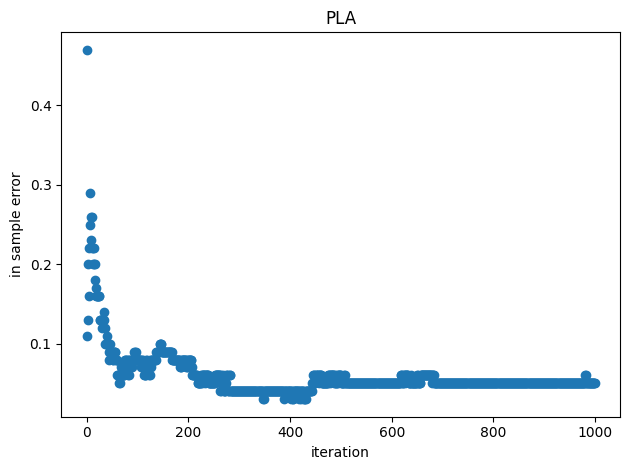

Ein_best 0.03, 
w_best 
[[ 1.00000010e+00]
 [ 1.27262727e+03]
 [-1.21966431e+03]]
Converging after  1000 iterations


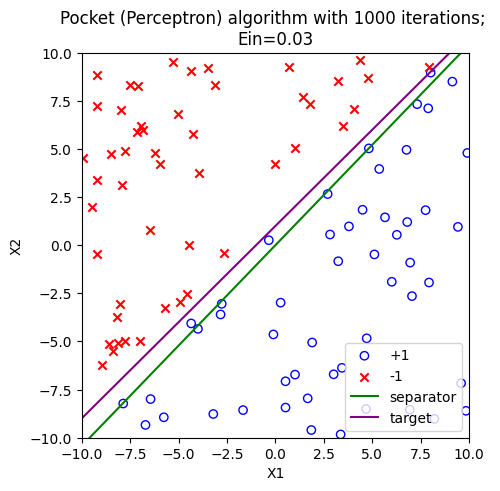

In [ ]:
execute = True
if execute:
    max_iters = 1000
    X = np.squeeze(np.asarray(X))
    y = np.squeeze(np.asarray(y))
    w = pocket(X,y, max_iters=max_iters)
    Ein = np.round(E(w, X, y), 5)
    plotLinearSeparator(
        w, X, y, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')


In [ ]:
X, y = generateSeparatedData(20, 2, ranges, w0)

Generating data with 20 data points, each with 2 dimensions


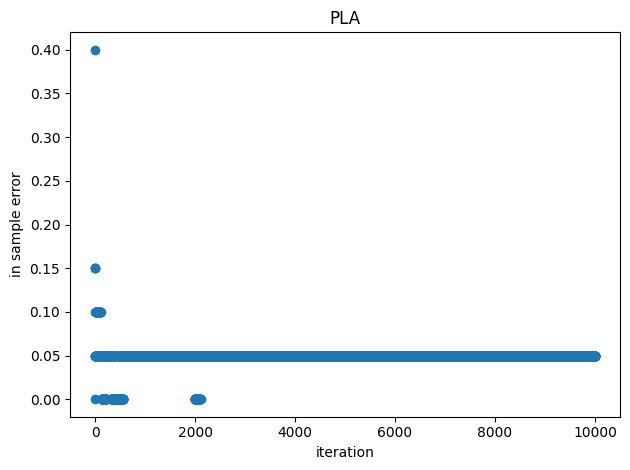

Ein_best 0.0, 
w_best 
[[ 9.99999998e-08]
 [ 2.41435135e+01]
 [-1.97187673e+01]]
Converging after  9771 iterations


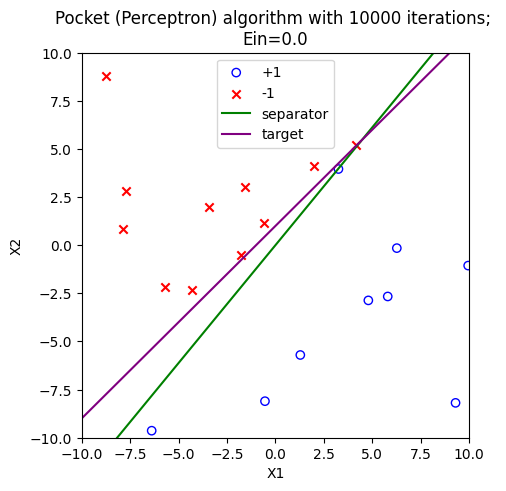

In [ ]:
execute = True
if execute:
    max_iters = 10000
    X = np.squeeze(np.asarray(X))
    y = np.squeeze(np.asarray(y))
    w = pocket(X,y, max_iters=max_iters)
    Ein = np.round(E(w, X, y), 5)
    plotLinearSeparator(
        w, X, y, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')
